In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/delhi_metro_raw (1).csv')
print(df.head())

   TripID        Date         From_Station            To_Station  Distance_km  \
0   59771  2022-05-08             Inderlok         Kashmere Gate        12.94   
1   21363  2023-01-12           Model Town        Dilshad Garden         2.33   
2  127325  2023-07-13     Kashmere Gate     Netaji Subhash Place         5.56   
3  140510  2022-11-10        Chandni Chowk             Hauz Khas         4.02   
4  144298  2022-11-06          Rajiv Chowk        Kalkaji Mandir         9.66   

     Fare  Cost_per_passenger  Passengers   Ticket_Type      Remarks  
0   77.99               18.27        13.0    Smart Card  maintenance  
1   35.89               83.71        15.0  Tourist Card  maintenance  
2   64.35               43.70         9.0        Single     off-peak  
3  144.13               14.98        27.0           NaN  maintenance  
4  104.96               83.84        23.0        Single     off-peak  


In [3]:
df.shape

(150000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TripID              150000 non-null  int64  
 1   Date                150000 non-null  object 
 2   From_Station        150000 non-null  object 
 3   To_Station          150000 non-null  object 
 4   Distance_km         150000 non-null  float64
 5   Fare                150000 non-null  float64
 6   Cost_per_passenger  150000 non-null  float64
 7   Passengers          148500 non-null  float64
 8   Ticket_Type         148500 non-null  object 
 9   Remarks             123743 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 11.4+ MB


In [5]:
df.columns

Index(['TripID', 'Date', 'From_Station', 'To_Station', 'Distance_km', 'Fare',
       'Cost_per_passenger', 'Passengers', 'Ticket_Type', 'Remarks'],
      dtype='object')

#Data Cleaning

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

We have null values in three columns

In [6]:
df.isnull().sum()[df.isnull().sum()>0]

,0
Passengers,1500
Ticket_Type,1500
Remarks,26257


Fill the mode of ticket type in NaN

In [8]:
max_ticket_type = df['Ticket_Type'].mode()[0]
df['Ticket_Type'] = df['Ticket_Type'].fillna(max_ticket_type)

Now we have only two columns with NaN values

In [9]:
df.isnull().sum()[df.isnull().sum()>0]

,0
Passengers,1500
Remarks,26257


Fill the median in NaN values

In [10]:
median_pass = int(df['Passengers'].median(skipna=True))
df['Passengers'] = df['Passengers'].fillna(median_pass)

Now we have only one column with NaN values

In [11]:
df.isnull().sum()[df.isnull().sum()>0]

,0
Remarks,26257


In [12]:
df['Remarks']

,Remarks
0,maintenance
1,maintenance
2,off-peak
3,maintenance
4,off-peak
...,...
149995,peak
149996,off-peak
149997,festival
149998,weekend


In [13]:
df['Remarks'] = df['Remarks'].replace('', np.nan)

In [14]:
max_remarks_value = df['Remarks'].mode()[0]
df['Remarks'] = df['Remarks'].fillna(max_remarks_value)

In [15]:
df['Remarks'].value_counts(dropna=False)

,count
Remarks,
off-peak,51116
festival,24812
maintenance,24771
weekend,24710
peak,24591


We have trailing spaces in "From_Station" Column

In [16]:
print(df['From_Station'].sample(5))

141134              New Delhi
25627          Dilshad Garden
27736          Rajouri Garden
13053          Janakpuri West
61094     Central Secretariat
Name: From_Station, dtype: object


In [17]:
df['From_Station'] = df['From_Station'].astype(str).str.strip().str.title()

##Now Calculating Profit

In [ ]:
df['Profit_per_passenger'] = df['Fare'] - df['Cost_per_passenger']

df['Profit'] = df['Profit_per_passenger'] * df['Passengers']
df.head()

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks,Profit_per_passenger,Profit
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance,59.72,776.36
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance,-47.82,-717.30
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak,20.65,185.85
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,Single,maintenance,129.15,3487.05
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak,21.12,485.76


In [ ]:
df.to_csv('delhi_metro_cleaned.csv')

# Data Visualization

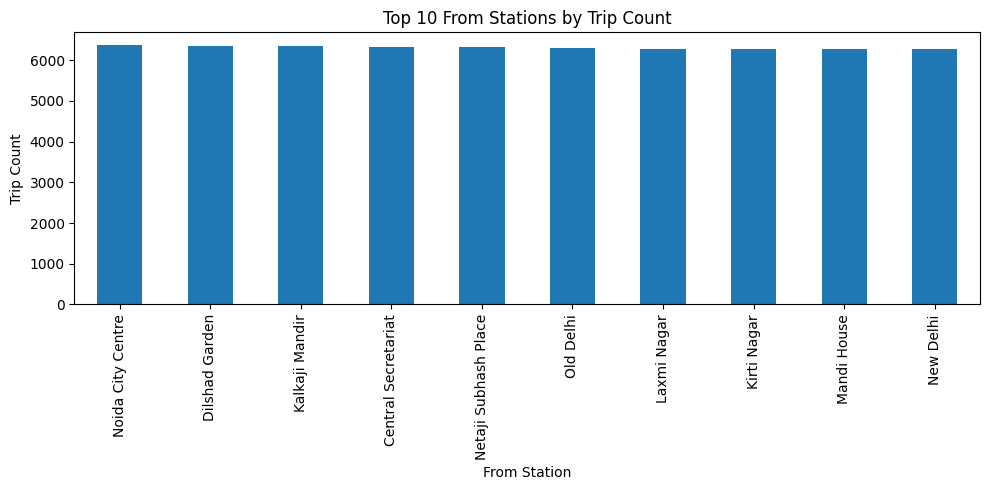

In [ ]:
plt.figure(figsize=(10,5))
station_counts = df['From_Station'].value_counts().nlargest(10)
station_counts.plot(kind='bar')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('From Station')
plt.ylabel('Trip Count')
plt.tight_layout()
plt.show()

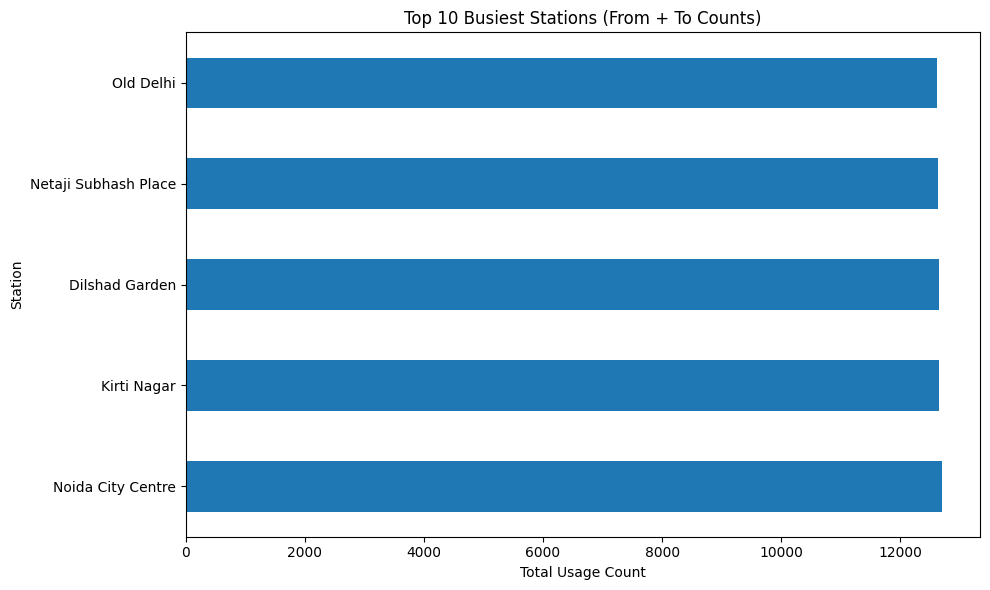

In [ ]:
plt.figure(figsize=(10,6))
total_station_counts = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(5)

total_station_counts.plot(kind='barh')
plt.title('Top 10 Busiest Stations (From + To Counts)')
plt.xlabel('Total Usage Count')
plt.ylabel('Station')

plt.tight_layout()
plt.show()


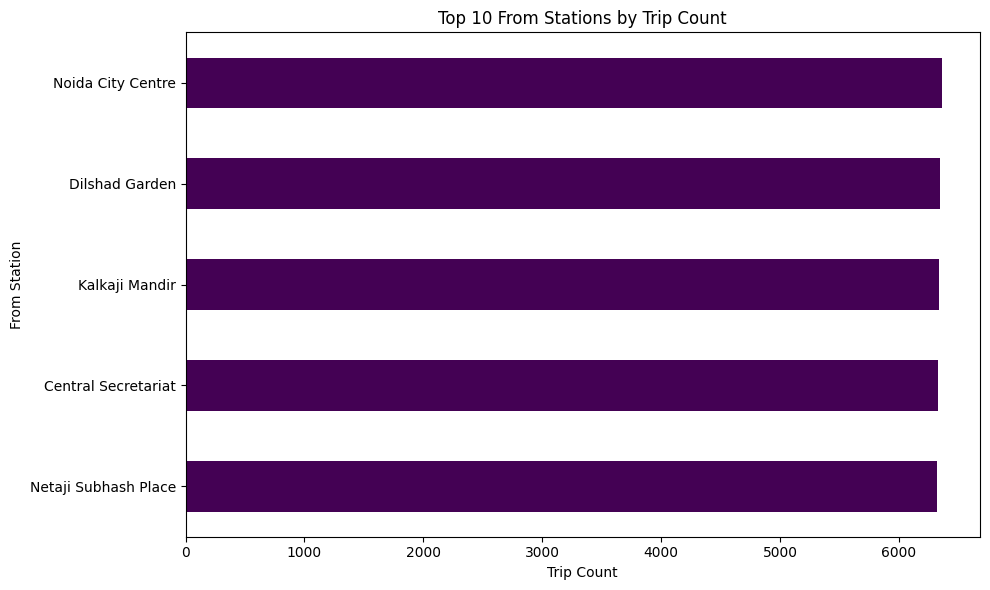

In [ ]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(5)

bars = station_counts.plot(kind='barh', cmap='viridis')
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


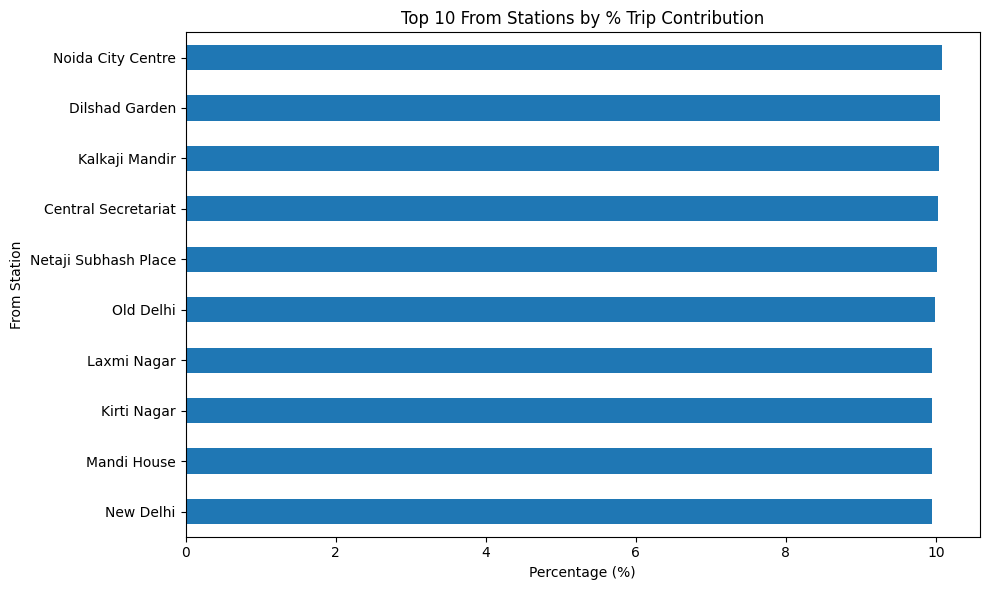

In [ ]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(10)
station_pct = (station_counts / station_counts.sum()) * 100

station_pct.plot(kind='barh')
plt.title('Top 10 From Stations by % Trip Contribution')
plt.xlabel('Percentage (%)')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


/tmp/ipython-input-3409609318.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=from_counts.values, y=from_counts.index, palette='viridis')


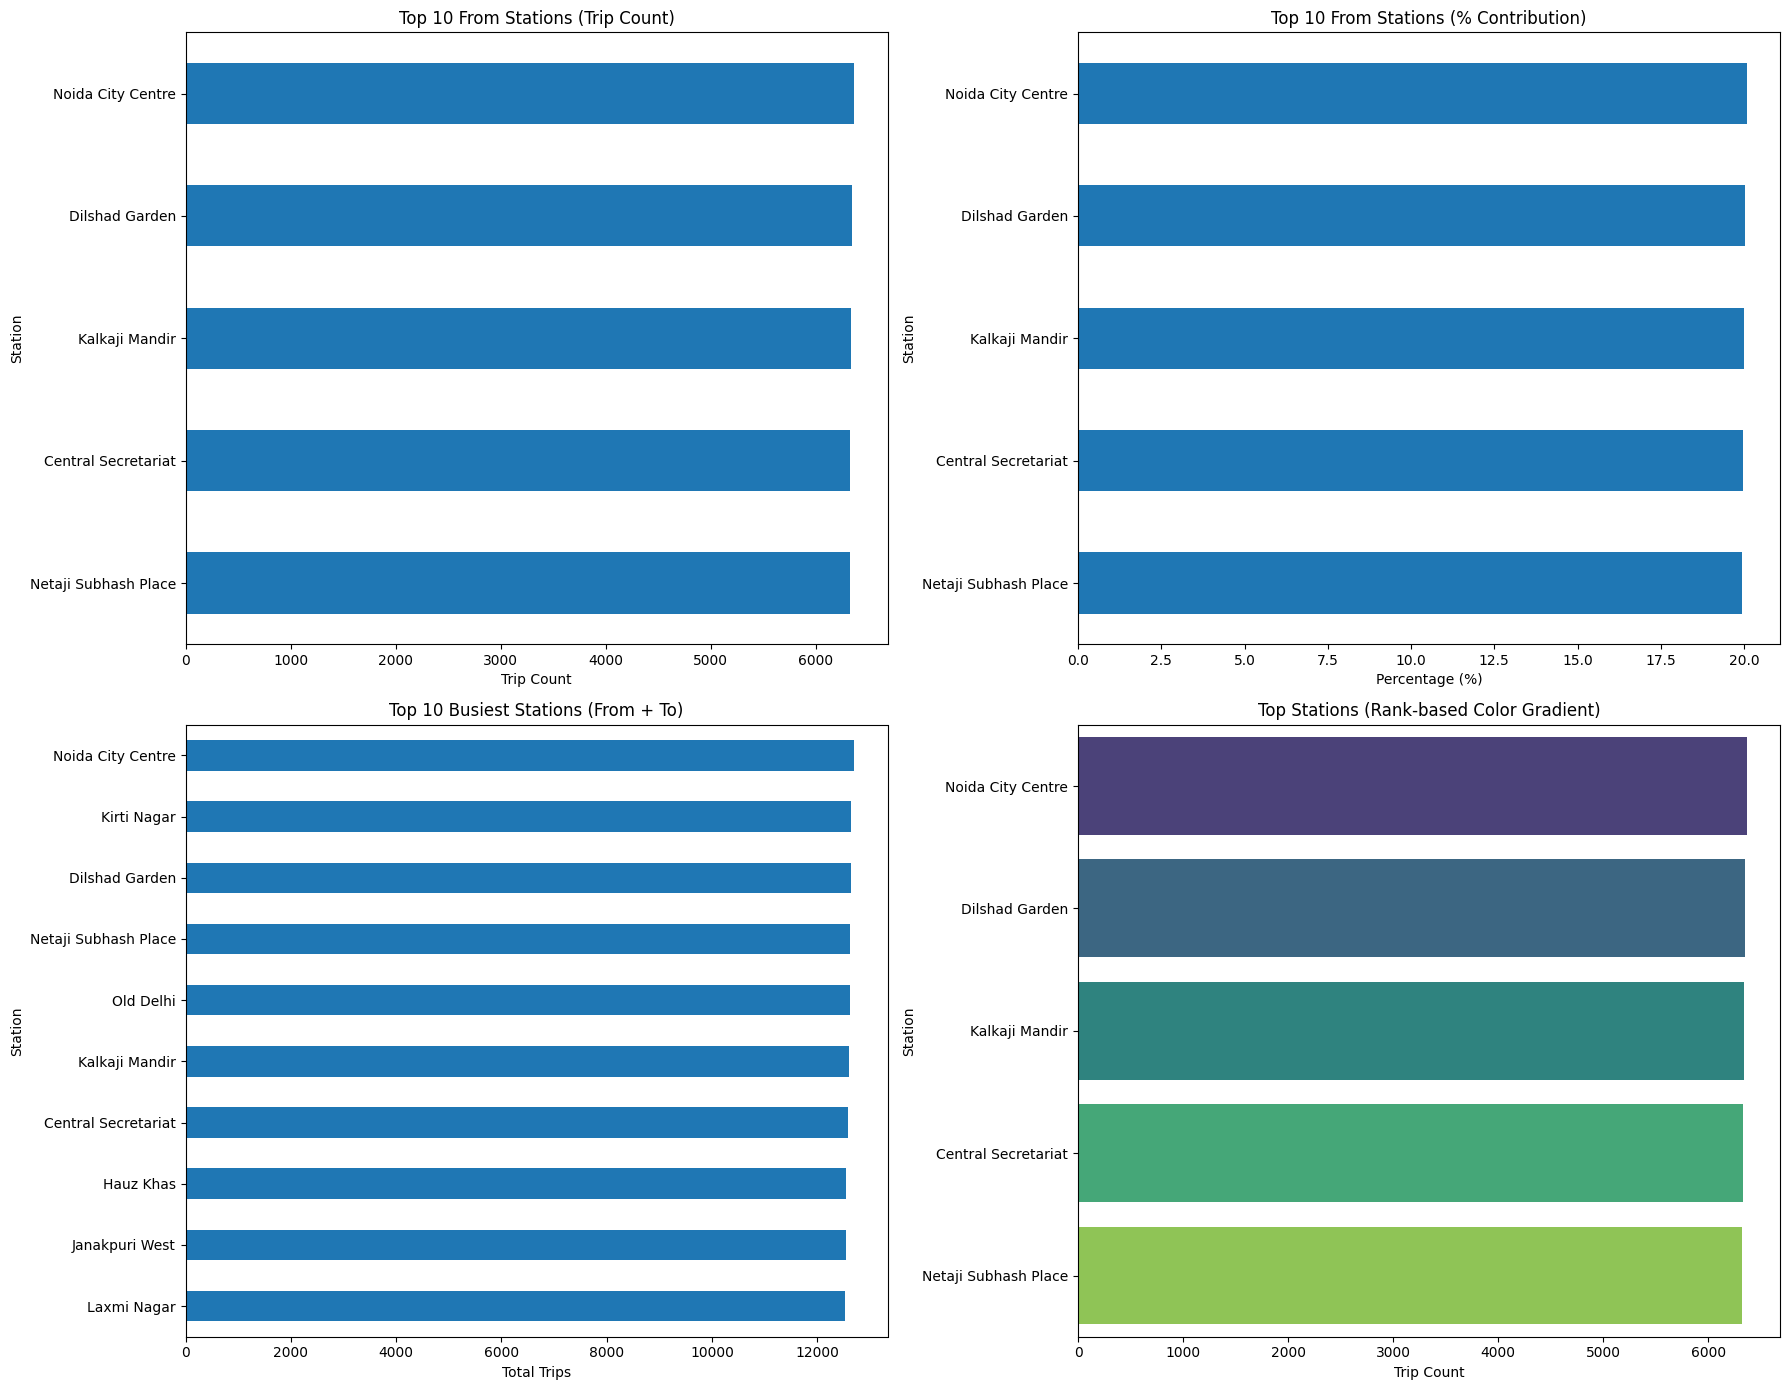

In [ ]:
# Prepare data
from_counts = df['From_Station'].value_counts().nlargest(5)
from_pct = (from_counts / from_counts.sum()) * 100
total_counts = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(10)

plt.figure(figsize=(18, 14))

# Chart 1: Top 10 From Stations (Count)
plt.subplot(2, 2, 1)
from_counts.plot(kind='barh')
plt.title('Top 10 From Stations (Trip Count)')
plt.xlabel('Trip Count')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 2: Percentage Contribution
plt.subplot(2, 2, 2)
from_pct.plot(kind='barh')
plt.title('Top 10 From Stations (% Contribution)')
plt.xlabel('Percentage (%)')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 3: Total Station Usage (From + To)
plt.subplot(2, 2, 3)
total_counts.plot(kind='barh')
plt.title('Top 10 Busiest Stations (From + To)')
plt.xlabel('Total Trips')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 4: Color Gradient Bar Chart for Ranking
plt.subplot(2, 2, 4)
sns.barplot(x=from_counts.values, y=from_counts.index, palette='viridis')
plt.title('Top Stations (Rank-based Color Gradient)')
plt.xlabel('Trip Count')
plt.ylabel('Station')

plt.tight_layout()
plt.show()


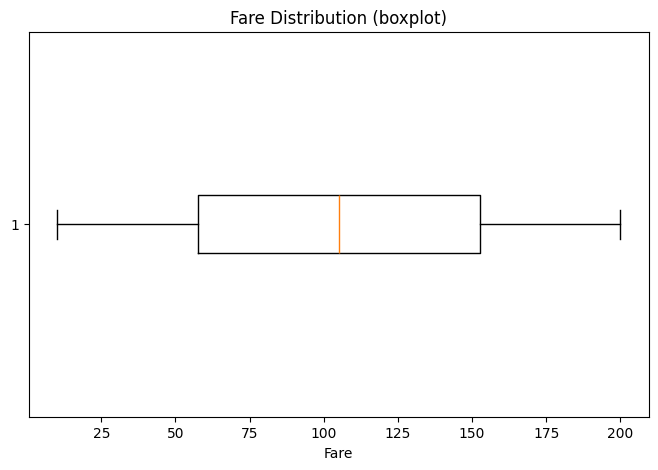

In [ ]:
plt.figure(figsize=(8,5))
plt.boxplot(df['Fare'].dropna(), vert=False)
plt.title('Fare Distribution (boxplot)')
plt.xlabel('Fare')
plt.show()

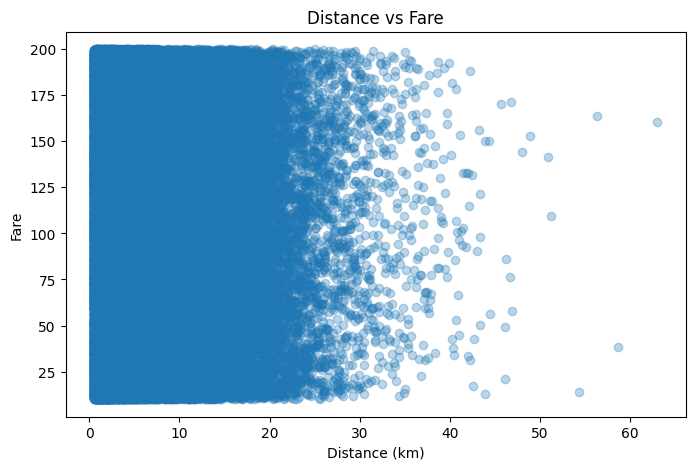

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Distance_km'], df['Fare'], alpha=0.3)
plt.title('Distance vs Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.show()

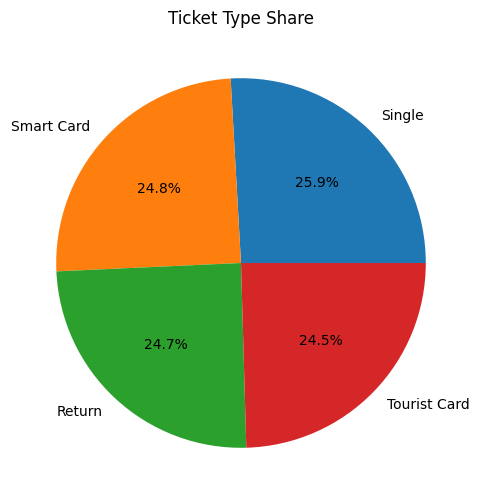

In [ ]:
plt.figure(figsize=(6,6))
tt = df['Ticket_Type'].fillna('Unknown').value_counts()
plt.pie(tt, labels=tt.index, autopct='%1.1f%%')
plt.title('Ticket Type Share')
plt.show()

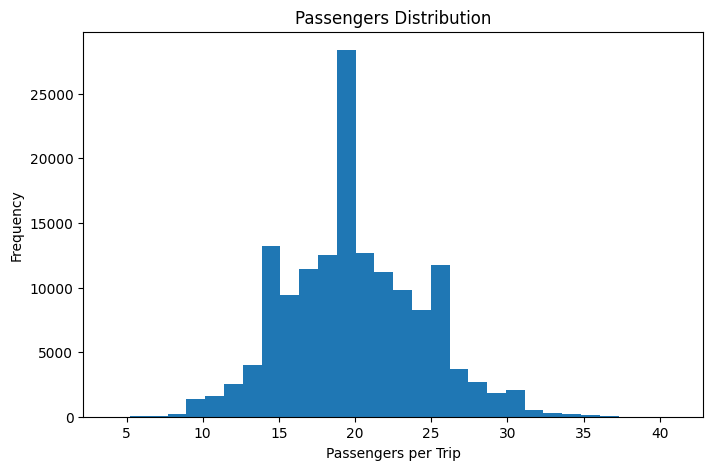

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['Passengers'], bins=30)
plt.title('Passengers Distribution')
plt.xlabel('Passengers per Trip')
plt.ylabel('Frequency')
plt.show()

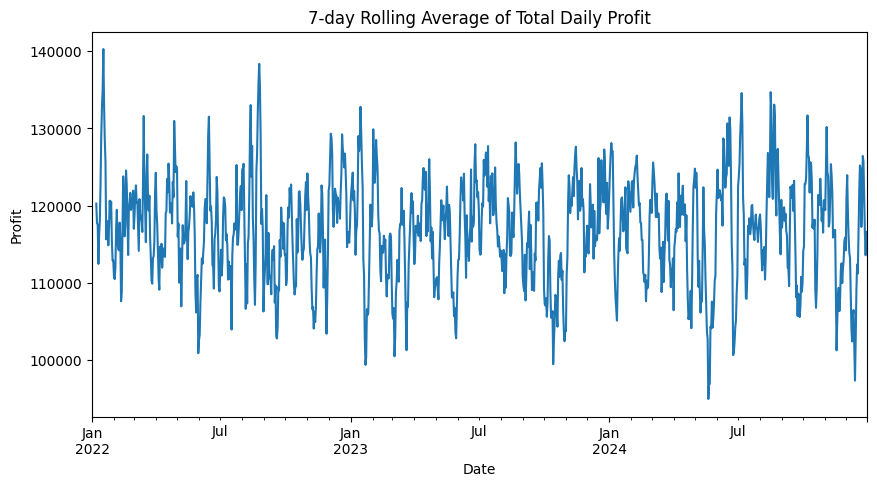

In [ ]:
plt.figure(figsize=(10,5))
df['Date'] = pd.to_datetime(df['Date'])
daily = df.groupby('Date')['Profit'].sum().sort_index()
daily.rolling(window=7).mean().plot()
plt.title('7-day Rolling Average of Total Daily Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()